# Introduction to Modern Mathematical Modeling
# Chapter 2; Basics of Python Programming

## Part 2; Fun with Packages

## Plotting with `MatPlotLib`

Simple plots in Python can be done using the `matplotlib` package, with
help from the numpy package:

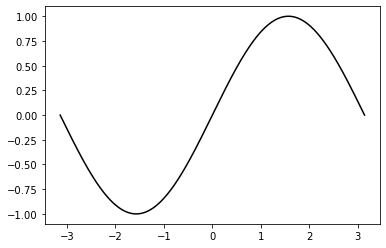

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# The 'import' keyword is used to include 'packages' that are not part of
# default python library. The 'as' keyword allows us to rename the imported
# package for use in our program. If we didn't rename the import, we would
# need to reference it with 'matplotlib.pyplot'. We also bring in the numpy
# package, which is optimized for many mathematical operations.

x = np.linspace(-np.pi, np.pi, 1000)
# This creates a 'vector' of 1000 equally-spaced points between -pi and pi.
# More on vectors later.

plt.plot(x,np.sin(x), 'k-')
# This statement actually plots what we want. The first argument to the
# function is a set of x values, the second is a set y values (in this
# case we are taking the sine of every point in our set of x's), and the
# last argument is a what's known as a 'format string', it tells the function
# how to draw the line itself. The 'k' markers black, and the '-' connects
# the markers with lines.

The plot we have above isn't bad, but we can do better by using other
`matplotlib` commands:

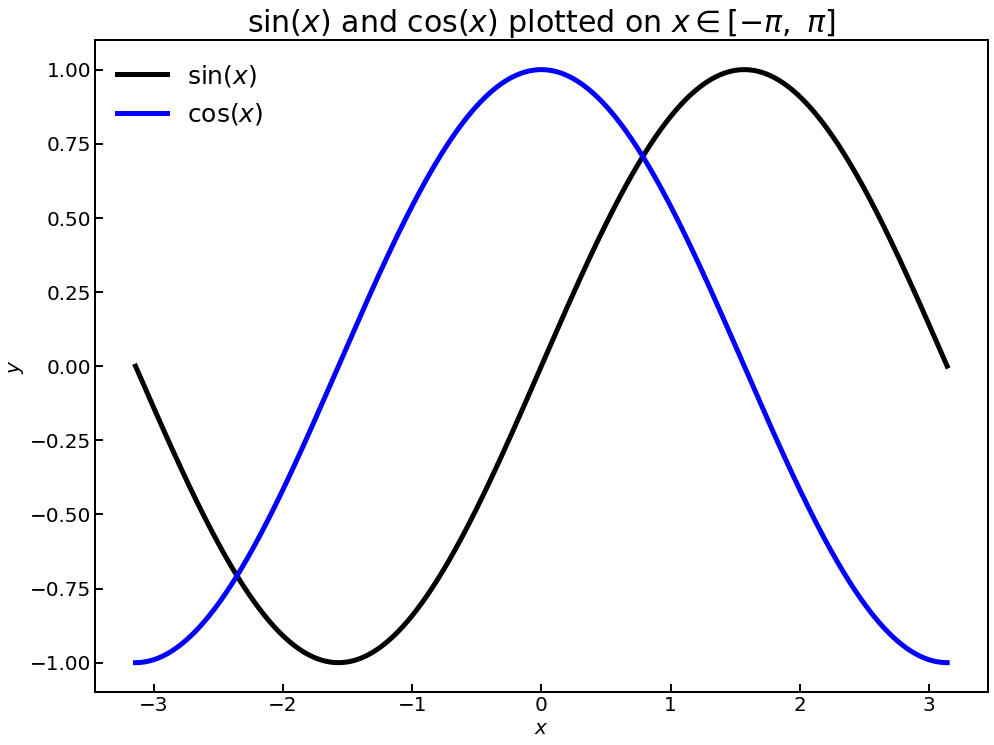

In [4]:
plt.figure(figsize=(16,12))
# the 'figure' function allows you to set specific attributes of the figure.
# Here we only use the figsize attribute to make the plot bigger. This plot
# is now 16 inches wide and 12 inches tall.

plt.plot(x,np.sin(x), 'k-', label="$\sin(x)$", linewidth=5)
plt.plot(x,np.cos(x), 'b-', label="$\cos(x)$", linewidth=5)
# 'label' allows you to name each curve on the plot,
# this may be necessary if you intend to plot more than
# one curve on your plot, like below. 'linewidth' does
# what you might expect.

plt.xlabel("$x$", size=20)
plt.ylabel("$y$", size=20)
# 'xlabel' and 'ylabel' allow you to label the x and y axis, respectively.
# 'size' allows you to choose the fontsize for the label.

plt.title("$\sin(x)$ and $\cos(x)$ plotted on $x \in [-\pi,\ \pi]$", size=30)
# 'title' allows you to set the title of the whole plot. Jupyter notebooks
# support the use of LaTeX in matplotlib plots, so you may include it between
# sets of $'s to display proper mathematical notation.

plt.legend(loc='upper left', framealpha=0, fontsize=25)
# If any of your curves are labeled, 'legend' allows you to have an inset
# legend on your plot. 'framealpha' allows you to set the opacity of the
# box that legend elements will be shown in, and 'fontsize' allows you to
# set the size of the text in the legend.

plt.setp(plt.gca().spines.values(), lw=2)
# 'setp' is a function that allows you to set arbitrary parameters of a
# matplotlib 'Axes'. There'll be more on 'Axes' later, and also what
# 'plt.gca()' means; but in this case, we're setting the width of the
# 'spines' of the plot (the lines that make up outermost boundaries of
# the plot). An alternative way to do this is given below:

for side in ['left', 'top', 'right', 'bottom']:
    plt.gca().spines[side].set_linewidth(2)
# This method uses a loop and dictionaries. More on both of those later.

plt.tick_params(direction='in', width=2, length=8, labelsize=20)
# 'tick_params' allows you to change how the ticks appear on the plot.
# 'direction' lets you choose which side of the 'spine' the tick appears
# on, 'width' lets you choose how wide the ticks are (direction parallel
# to spines), 'length' lets you modify how long the ticks are (direction
# perpendicular to spines), and 'labelsize' lets you choose the font size
# of the labels on each tick.


If you look closely, you may notice the functions we needed above we're
accessed in this manner: `np.\*`, `plt.\*`. The `.` member operator allows
you to access the `members` of an object. In Computer Science, Objects are
ways of encapsulating many different pieces of data and functions (called
members) into a single entity. Without getting too deep into the details,
mostly everything is an object in Python and the `.` operator is necessary
to access all of an object's members. From here on out, when using functions
or pieces of data from a specific package you'll see the `.` operator used
frequently.

In [5]:
from mpl_toolkits import mplot3d
# We import the mplot3d from mpl_toolkits, another python package necessary
# for plotting in 3D, such an contour plots.

def f(x, y):
    return np.sin(-x)*np.exp(-y**2)
# This define a function that accepts 2 arguments and returns a single one.
# Much like the np.sin and np.cos functions, above we can evaluate this function
# over whole sets of x's and y's. More on that when we get to vectors.

x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-1, 1, 100)
# We'll use these vectors for the 3d plot below.

X, Y = np.meshgrid(x, y)
# np.meshgrid creates a structure that associates each point in an x-y plane with
# with a set of components that correspond to the coordinates of x and y at that
# point.

Z = f(X, Y)
# Z contains f evaluated at ever point in the meshgrid X, Y.

Text(0.5, 0, 'z')

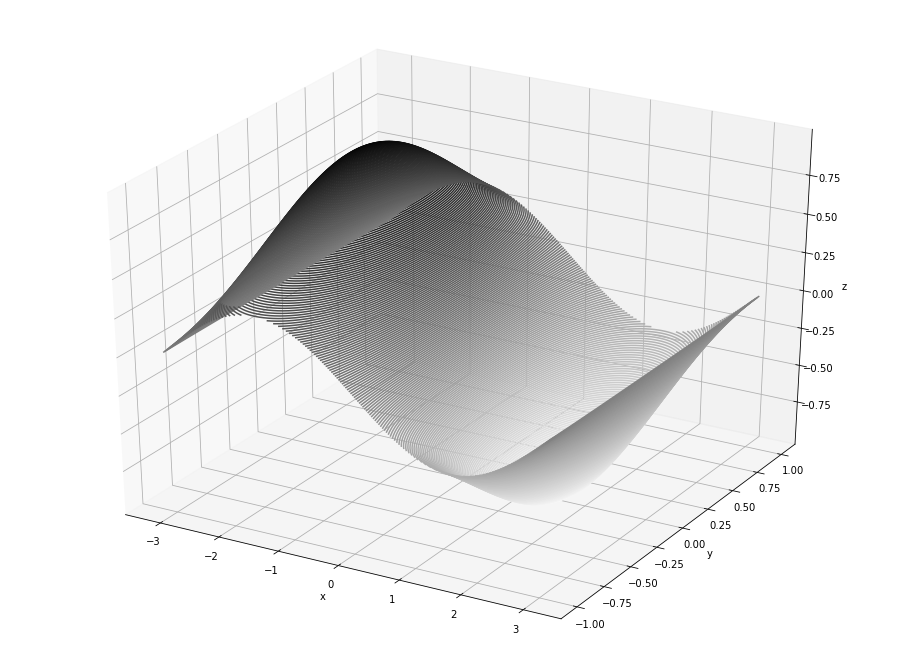

In [6]:
# The code below uses the X, Y, and Z variables from above to create the contour
# plot below. Play with the code and see what you can change based on what we've
# already seen!
plt.figure(figsize=(16,12))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 200, cmap='binary')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

## Symbolic calculus using SymPy

### Differentiation

In [7]:
import sympy
# The sympy package is used for symbolic operations, like finding derivatives and
# indefinite integrals.

x, y, z = sympy.symbols('x y z')
# sympy.symbols creates a set of 'symbolic' variables, analogous to variables in
# the normal calculus sense.

In [8]:
sympy.diff(sympy.ln(x), x)
# sympy.diff allows you to compute derivatives. The first argument is the expression
# whose derivative you want to find and the second argument is the variable you are
# taking the derivative with respect to.

1/x

In [9]:
sympy.diff(sympy.exp(sympy.cos(y)**2), y)

-2*exp(cos(y)**2)*sin(y)*cos(y)

In [10]:
r = sympy.sqrt(x**2 + y**2 + z**2)
# Once you have symbolic variables, you can create complex expressions and
# assign them to other variables.

sympy.diff(r, x, y, z)
# If you're expression involves multiple variables you can also compute partial
# derivatives, even with respect to multiple variables at once. This is equivalent
# to taking the partials of r with respect to x, y, and z.

3*x*y*z/(x**2 + y**2 + z**2)**(5/2)

In [11]:
fPrime = sympy.Derivative(r, x, y, z)
# sympy.Derivative gives the symbolic expression before the derivative
# is evaluated. Assigning it to a variable allows you to evaluate it later.
fPrime

Derivative(sqrt(x**2 + y**2 + z**2), x, y, z)

In [12]:
fPrime.doit() # doit allows you to evaluate fPrime.

3*x*y*z/(x**2 + y**2 + z**2)**(5/2)

In [13]:
f = (x*y)**z
f.diff((z, 2))
# Calling diff on a saved expression allows you to take higher order derivatives.
# For example, this takes the second order derivative of f with respect to z.

(x*y)**z*log(x*y)**2

In [14]:
expx = sympy.exp(-x)
iexpx = sympy.integrate(expx, x)
# sympy.integrate allows you to compute the indefinite integral of the expression;
# however, the constant of integration is left off.

In [15]:
sympy.Integral(expx, x)
# Similar to sympy.Derivative, sympy.Integral gives you the integral before
# evaluation.

Integral(exp(-x), x)

In [16]:
sympy.integrate(expx,(x, 0, np.inf))
# If the expression has an elementary antiderivative, then including bounds
# will compute the definite integral.

1

In [17]:
sympy.integrate(sympy.exp(sympy.cos(x)), x)
# If the expression does not have an elementary antiderivative, then
# you will get back an unevaluated integral. There are ways that can
# Python can numerically integrate expressions like this one, but that
# is beyond the scope of this chapter.

Integral(exp(cos(x)), x)

Checking that the above derivatives and integrals are correct is left as an exercise for the reader.

## Vectors, Matrices, and Linear Algebra
The following sections makes heavy use of the numpy package, due to it's powerful central construct: the numpy n-dimensional array or ndarray.

*A small note on vocabulary*: Generally, the word vector is associated with, and analogous to, a 1-dimensional array. In spite of this, most of the things we have to say about vectors also apply to higher dimensional arrays and by that same token it may be the case that the terms 'matrix' and '2-dimensional array' are also interchangeable.
### The ndarray

In [18]:
v = np.array([1,2,3])
# np.array creates a ndarray with the given list as elements. For example,
# this creates a row vector that contains the elements [1, 2, 3].

print(f"v: {v}")
# The print function can be used on vectors to display their contents.

print(f"shape of v: {v.shape}")
# All numpy arrays have a 'shape' attribute that tells you how many dimensions
# the array has and how large those dimensions are. In this case, v is a
# 1-dimensional array of length 3.

print(f"transpose of v: {np.transpose(v)}")
# np.transpose gives the transpose of the array. In this case, the transpose
# does nothing because v is a 1-dimensional array.

v = np.array([v])
print(f"new v: {v}")
print(f"shape of new v: {v.shape}")
# However, redefining v in this way turns it into a 2-dimensional array,
# where 1 dimension is of length 1 and the other is of length 3; which
# is reflected in the new output of v.shape.

print(f"transpose of new v:\n{np.transpose(v)}")
# Since v is now a 2-dimensional array, we also get the transpose we expect.

m = np.array([[1,2],[3,4]])
# You can also create 2-dimensional arrays that are analogous to matrices.

print(f"m:\n{m}")
print(f"shape of m: {m.shape}")
print(f"transpose of m:\n{np.transpose(m)}")

v: [1 2 3]
shape of v: (3,)
transpose of v: [1 2 3]
new v: [[1 2 3]]
shape of new v: (1, 3)
transpose of new v:
[[1]
 [2]
 [3]]
m:
[[1 2]
 [3 4]]
shape of m: (2, 2)
transpose of m:
[[1 3]
 [2 4]]


### Accessing array elements and array slices
After defining a vector or matrix, it may be necessary to access specific elements. This is done with the indexing operator [ ].

In [19]:
d = np.random.randint(-5, 5, size=10)
print(f"d: {d}")
# This is a method to generate 10 random integers between -5 and 5.
# More on the 'random' module later.

print(f"first element of d: {d[0]}")
print(f"last element of d: {d[d.size-1]}")
# Using the indexing operator on an array allows you to access specific
# elements of the array, each element has it's own index in the array.
# Indexing starts at 0 and ends at the length of the vector minus 1.
# Trying to access indices outside of this range for any given array
# will cause an error.

print(f"last element of d: {d[-1]}")
# You can also get the last element of the vector by indexing '-1'.

d: [ 4 -1  0  1 -5 -1 -2  4 -4  0]
first element of d: 4
last element of d: 0
last element of d: 0


You can also access subsets of a vector using array slicing with the
indexing operator.

In [20]:
print(f"first three elements of d: {d[0:3]}")
print(f"first three elements of d: {d[ :3]}")
print(f"last three elements of d: {d[7: ]}")
print(f"d: {d[:]}")
print(f"every third element of d: {d[ : :3]}")
# The ':' symbol allows you to specify a range of indices to
# access from the array. Leaving off the first index will access
# all elements up to the second index, and leaving off the second
# accesses all elements including and after the first. Leaving off
# both access the whole array. You can also give a third number to
# specify an increment.

print(f"First row of m: {m[0,:]}")
print(f"Second column of m: {m[:,1]}")
# Array indexing and slicing can also be done on matrices, but instead you index
# in multiple dimension, like so: m[d1, d2].

first three elements of d: [ 4 -1  0]
first three elements of d: [ 4 -1  0]
last three elements of d: [ 4 -4  0]
d: [ 4 -1  0  1 -5 -1 -2  4 -4  0]
every third element of d: [ 4  1 -2  0]
First row of m: [1 2]
Second column of m: [2 4]


### Vectorization
One of the powerful tools that the `ndarray` provides is something called
vectorization, which allows you to perform mathematical operations on
entire vectors as opposed to doing those operations element by element,
sequentially.

In [21]:
u = np.arange(0,10)
w = np.arange(10,20)
l = u + w
# np.arange creates a sequence of integers from the first argument to the
# last, with the last not being included; so u is [0, ..., 9] and w is
# [10, ... , 19], they are also 1-dimensional numpy ndarrays. (just about
# all arrays that you get from numpy functions are ndarrays.)

print(f"u + w: {l}")
# This is a vectorized sum; in other words, every element of u and w that
# are in the same position are added together and a new vector is created
# from these pairwise additions. Addition is not special in this respect,
# though, as subtraction, multiplication, division, and even exponentiation
# support vectorization.

print(f"u - w: {u - w}")
print(f"u*w: {u * w}")
print(f"u/w: {u / w}")
print(f"u**w: {u**w}")

m1 = np.arange(0,100).reshape(10,10)
m2 = np.arange(100,200).reshape(10,10)
# All numpy arrays also have the reshape function, which allows you to turn
# a vector into a 2-dimensional array or matrix. Note that the length of the
# vector must equal the product of the dimensions of the matrix for reshape
# to work properly.

print("m1 + m2:\n", m1 + m2)
# In spite of it being called 'vectorization' it also applies to matrices
# as well. The key thing to bear in mind with vectorization between ndarrays
# is that the 2 ndarrays involved must be of the length for vectors or of
# the same dimensions for higher dimensional arrays.

u + w: [10 12 14 16 18 20 22 24 26 28]
u - w: [-10 -10 -10 -10 -10 -10 -10 -10 -10 -10]
u*w: [  0  11  24  39  56  75  96 119 144 171]
u/w: [0.         0.09090909 0.16666667 0.23076923 0.28571429 0.33333333
 0.375      0.41176471 0.44444444 0.47368421]
u**w: [          0           1        4096     1594323   268435456   452807053
  -683606016 -2094633337           0  -400556711]
m1 + m2:
 [[100 102 104 106 108 110 112 114 116 118]
 [120 122 124 126 128 130 132 134 136 138]
 [140 142 144 146 148 150 152 154 156 158]
 [160 162 164 166 168 170 172 174 176 178]
 [180 182 184 186 188 190 192 194 196 198]
 [200 202 204 206 208 210 212 214 216 218]
 [220 222 224 226 228 230 232 234 236 238]
 [240 242 244 246 248 250 252 254 256 258]
 [260 262 264 266 268 270 272 274 276 278]
 [280 282 284 286 288 290 292 294 296 298]]


Vectorization is not just restricted to operations between vectors or matrices
though, it can used with scalars as well:

In [22]:
print(f"u: {u}")
print(f"2 + u: {2 + u}")
# Here we have the u vector from the previous cell, and then the vectorized sum
# between 2 and u. Unlike sums between vectors, instead 2 is added to each
# element of u and like the previous case there is nothing special about
# addition here.

print(f"2 - u: {2 - u}")
print(f"2*u: {2*u}")
print(f"u/2: {u/2}")
print(f"2**u: {2**u}")

u: [0 1 2 3 4 5 6 7 8 9]
2 + u: [ 2  3  4  5  6  7  8  9 10 11]
2 - u: [ 2  1  0 -1 -2 -3 -4 -5 -6 -7]
2*u: [ 0  2  4  6  8 10 12 14 16 18]
u/2: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
2**u: [  1   2   4   8  16  32  64 128 256 512]


Other numpy functions also support vectorization, as we saw during the
plotting portion:

In [23]:
print(f"e**u:\n{np.exp(u)}")
# The exponential function.

print(f"sin(u):\n{np.sin(u)}")
# Sine of u.

print(f"cos(u):\n{np.cos(u)}")
# Cosine of u. Note that for trig functions, the arguments are radians.

print(f"ln(u+1):\n{np.log(u+1)}")
# The natural logarithm. Note that log2 and log10 also exist.

print(f"cos(pi): {np.cos(np.pi)}")
# Further, each of these functions support scalar arguments, as well.
# (By scalars, I mean single values that aren't part of a vector or matrix,
# like individual numbers.)

e**u:
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]
sin(u):
[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]
cos(u):
[ 1.          0.54030231 -0.41614684 -0.9899925  -0.65364362  0.28366219
  0.96017029  0.75390225 -0.14550003 -0.91113026]
ln(u+1):
[0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154 2.19722458 2.30258509]
cos(pi): -1.0


### Matrix Multiplication

In [24]:
print(f"m1@m2:\n{m1@m2}")
print(f"m1@u:\n{m1@u}")
# The '@' symbol is used for conventional matrix multiplication. As such it
# follows the definition of matrix multiplication that we find in Linear
# Algebra regarding the dimensions of the 2 operands.

print(f"shape of m1: {m1.shape}")
print(f"shape of m2: {m2.shape}")
print(f"shape of u: {u.shape}")
# If you're unsure whether a multiplication is possible, check the dimensions
# using the shape attribute.

m1@m2:
[[  7350   7395   7440   7485   7530   7575   7620   7665   7710   7755]
 [ 21850  21995  22140  22285  22430  22575  22720  22865  23010  23155]
 [ 36350  36595  36840  37085  37330  37575  37820  38065  38310  38555]
 [ 50850  51195  51540  51885  52230  52575  52920  53265  53610  53955]
 [ 65350  65795  66240  66685  67130  67575  68020  68465  68910  69355]
 [ 79850  80395  80940  81485  82030  82575  83120  83665  84210  84755]
 [ 94350  94995  95640  96285  96930  97575  98220  98865  99510 100155]
 [108850 109595 110340 111085 111830 112575 113320 114065 114810 115555]
 [123350 124195 125040 125885 126730 127575 128420 129265 130110 130955]
 [137850 138795 139740 140685 141630 142575 143520 144465 145410 146355]]
m1@u:
[ 285  735 1185 1635 2085 2535 2985 3435 3885 4335]
shape of m1: (10, 10)
shape of m2: (10, 10)
shape of u: (10,)


### Linear Algebra
In addition to what we've already seen, numpy also has a robust set of
linear algebra functions.

In [25]:
m = np.random.randint(-10, 10, size=(3,3))
b = np.random.randint(-10, 10, size=3)
# Here we use the random module again to create a matrix and
# vector to use the linear algebra functions on.

print(f"\nm:\n{m}")
print(f"\nb: {b}")
print(f"\nDeterminant of m: {np.linalg.det(m)}")
# np.linalg.det computes the determinant of the matrix.

print(f"\nx such that mx=b: {np.linalg.solve(m,b)}")
# np.linalg.solve solves the linear system of [m |b].

print(f"\nDiagonal matrix of b:\n{np.diag(b)}")
# np.diag creates a diagonal matrix that has the elements of b on
# it's diagonal. Note that this function only works on vectors.

print(f"\nInverse of m:\n{np.linalg.inv(m)}")
# np.linalg.inv computes the inverse of the matrix. Note that for
# singular matrices, this function will have an error.

print(f"\nm@mInverse:\n{m@np.linalg.inv(m)}")
# Here we verify that the inverse is the in fact the inverse. The
# result may not exactly be the identity due to round off errors.

print(f"\nIdentity Matrix of dimension 3:\n{np.identity(3)}")
# np.identity creates an identity matrix of the same dimension as the
# integer argument.

e,ev = np.linalg.eig(m)
print(f"\nEigenvalues of m:\n{e}")
print(f"\nEigenvectors of m:\n{ev}")
# np.linalg.eig computes the eigenvalues and eigenvectors of a matrix.
# Each are returned as separate arrays, so we store each in a variable
# to display them individually.

U, S, V = np.linalg.svd(m)
print(f"\nLeft-singular matrix of m:\n{U}")
print(f"\nSingular values of m:\n{S}")
print(f"\nRight-singular matrix of m:\n{V}")
# np.linalg.svd computes the singular value decomposition of a matrix.
# Like the previous function, this one returns multiple arrays, so we
# store each in it's own variable and display them in turn.

print(f"\nDot product of b and (b + 1): {np.dot(b,b+1)}")
# np.dot computes the dot product of 2 vectors; alternatively,
# the dot product can be computed using normal matrix
# multiplication and np.transpose.


m:
[[-1 -7  2]
 [ 1 -8  9]
 [ 3  6  6]]

b: [-10   7  -4]

Determinant of m: 15.000000000000007

x such that mx=b: [105.73333333 -22.53333333 -31.        ]

Diagonal matrix of b:
[[-10   0   0]
 [  0   7   0]
 [  0   0  -4]]

Inverse of m:
[[-6.8         3.6        -3.13333333]
 [ 1.4        -0.8         0.73333333]
 [ 2.         -1.          1.        ]]

m@mInverse:
[[1.0000000e+00 4.4408921e-16 4.4408921e-16]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00]]

Identity Matrix of dimension 3:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Eigenvalues of m:
[  8.6481269   -0.15086017 -11.49726673]

Eigenvectors of m:
[[ 0.15469193 -0.9428045  -0.56473562]
 [-0.4626275   0.19218677 -0.74611759]
 [-0.87295258  0.27236726  0.35267865]]

Left-singular matrix of m:
[[ 0.4950841   0.29476254 -0.81731682]
 [ 0.86508666 -0.25463695  0.43218641]
 [-0.0807267  -0.9210185  -0.38106184]]

Singular values of m:
[13.67251372  9.69791581  0.11312653]

Right-singular m

## Statistics with NumPy
For statistical purposes, we have some functions built into numpy and we'll use them along with MatPlotLib.

In [26]:
x = np.random.normal(loc=0, scale=1,size=10)
# The np.random module allows you to generate random values within a
# given probability distribution. In this case, we generate 10 random
# values within a normal distribution mean 0 and standard deviation 1.
# Some function support keyword arguments, which is what we have here.
# Instead of passing arguments by position, you can specify by name.

print(f"x: {x}")

print(f"\nmean(x): {np.mean(x)}")
# np.mean computes the arithmetic mean of the vector x.

print(f"\nvar(x): {np.var(x)}")
# np.var computes the variance of the vector x.

print(f"\nstd(x): {np.std(x)}")
# np.std computes the standard deviation of the vector x.

print(f"\nmedian(x): {np.median(x)}")
# np.median computes the median of the vector x.

print(f"\nquantiles(x): {np.quantile(x,[0,.25,.50,.75,1])}")
# np.quantile computes percentiles of a vector x. In
# addition to the vector itself, it is necessary to
# provide the percentiles either individually, or as
# a list. This example return a vector of the quantiles.

print(f"\nmin(x): {np.min(x)}")
# np.min returns the least value of the vector x.

print(f"\nmax(x): {np.max(x)}")
# np.max returns the greatest value of the vector x.


x: [-1.61272777e+00 -1.43129418e-04 -4.29209406e-01  3.96772694e-01
  7.18097014e-01 -1.59150431e-01 -2.26395673e-01  2.54903860e-01
  1.90553182e-01 -4.95983756e-01]

mean(x): -0.1363283415124688

var(x): 0.3696219559394364

std(x): 0.6079654233091192

median(x): -0.0796467802747654

quantiles(x): [-1.61272777 -0.37850597 -0.07964678  0.23881619  0.71809701]

min(x): -1.6127277700997267

max(x): 0.7180970135701392


The cells below show how we can use `MatPlotLib` for statistical purposes
along with normal mathematical plotting.

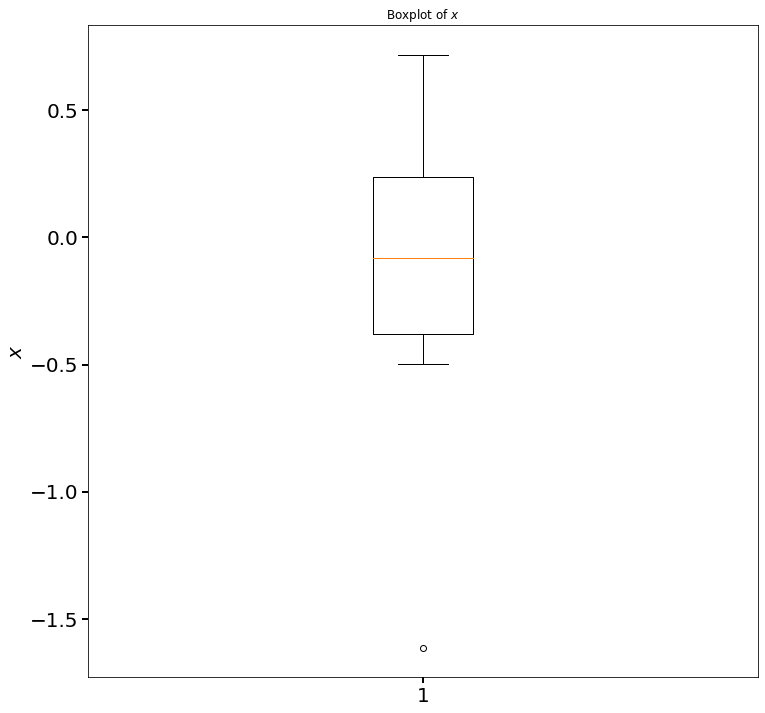

In [27]:
plt.figure(figsize=(12,12))
plt.boxplot(x)
# plt.boxplot creates a box plot of the data.
plt.ylabel("$x$", size = 20)
plt.title("Boxplot of $x$")
plt.tick_params(length=6, width=2, labelsize=20)

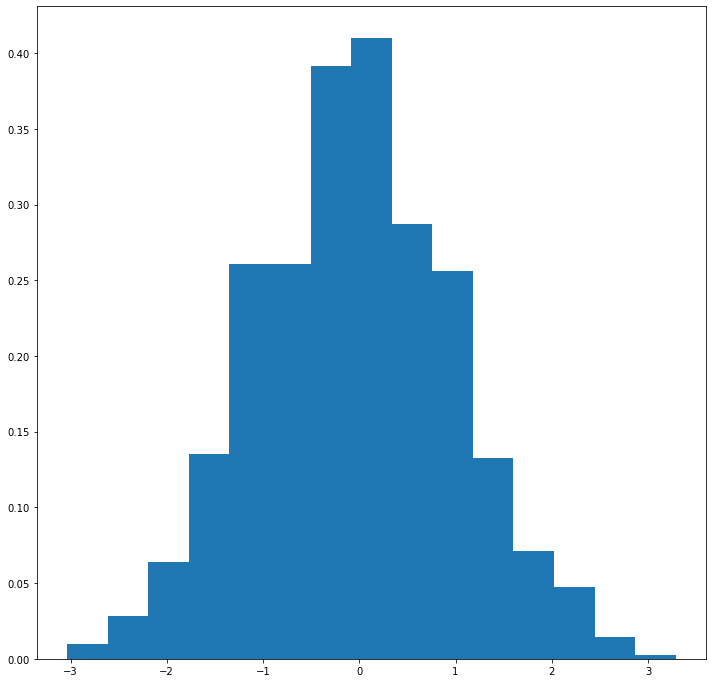

In [28]:
w = np.random.normal(size=1000)
z = np.random.normal(loc=10, scale=5, size=1000)
# Like the definition of x above, here we generate random values.
# Functions that support keyword arguments also support default
# arguments. What this means is that if some keyword arguments
# are left off, a default argument will be used. In the case of
# np.random.normal the defaults are loc=0, scale=1.

params={'loc':0, 'scale':1, 'size':1000}
w = np.random.normal(**params)
# You can also pass keyword arguments using what are called dictionaries.
# Basically, a dictionary is a set of 'keys' and 'values' that are associated
# with each other; if the 'keys' are the same name as the keyword arguments
# of the function you're going to use, then the dictionary can be used as a
# single argument for the function, provided that you use the '**' operator.
# More on that later.

plt.figure(figsize=(12,12))
plt.hist(w, bins = 15, range=(np.min(w),np.max(w)), density=True);
# plt.hist can be used to produce a histogram.

### The `help` and `type` functions
Two very useful built-in `python` functions that can help when debugging
or otherwise improving code are the `help` and `type` functions.

In [35]:
help(np.array)
# The help function displays information regarding whatever is passed
# in as an argument. Variables, function handles, and data structures
# can be arguments.

Help on built-in function array in module numpy:

array(...)
    array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        __array__ method returns an array, or any (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then the type will
        be determined as the minimum type required to hold the objects in the
        sequence.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if __array__ returns a copy, if obj is a nested sequence,
        or if a copy is needed to satisfy any of the other requirements
        (`dtype`, `order`, etc.).
    order : {'K', 'A', 'C', 'F'}, optional
        Specify the memory layout of the array. If object is not an array, the
        newly crea

In [36]:
var_types = [1, .43, True, "String", (2,3), help, [2]]
for (i, item) in enumerate(var_types):
    print(f"Type of item {i}: {type(item)}")
# The type function tells you exactly what the argument is. This
# can be useful when you're trying to do something very specific
# with your code, but you're unsure about the individual components
# of it. The help function can even be used on the type of something
# for even more relevant information.

Type of item 0: <class 'int'>
Type of item 1: <class 'float'>
Type of item 2: <class 'bool'>
Type of item 3: <class 'str'>
Type of item 4: <class 'tuple'>
Type of item 5: <class '_sitebuiltins._Helper'>
Type of item 6: <class 'list'>
Help on int object:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |  
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |  
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      